In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

In [106]:
data_url = "https://raw.githubusercontent.com/shala2020/shala2020.github.io/master/Lecture_Materials/Assignments/MachineLearning/L2/titanic.csv"
df = pd.read_csv(data_url)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [107]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [108]:
'''
We have high number of null values in Age and Cabin columns
'''
print(df.isna().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


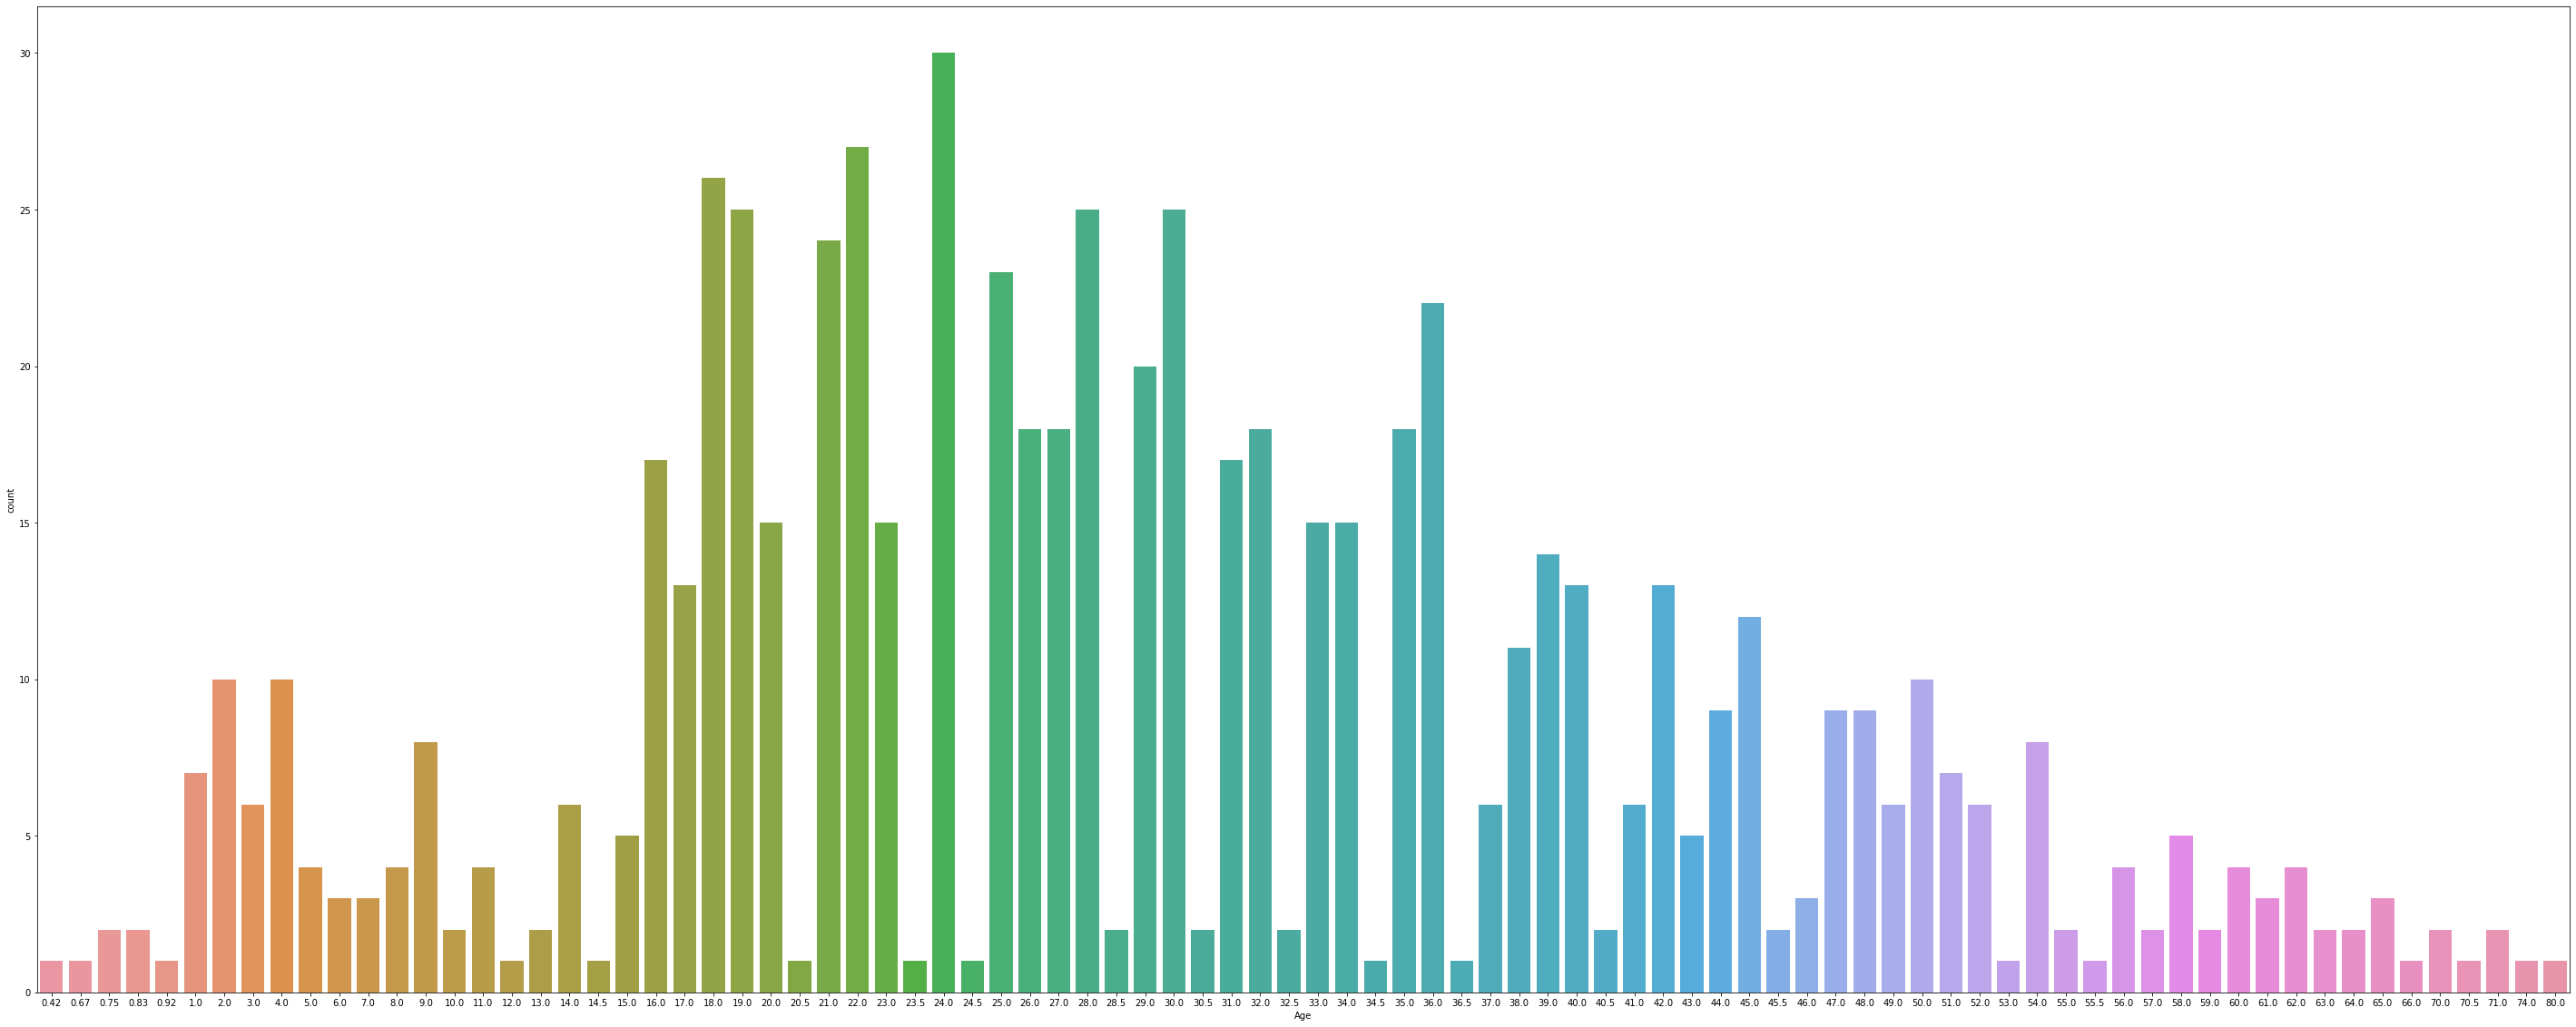

In [109]:
plt.figure(figsize=(50,20))
sns.countplot(x='Age', data=df)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5942f13b70>]],
      dtype=object)

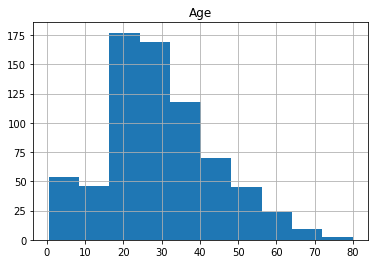

In [110]:
# We can observe an almost normal distribution
df.hist(column="Age")

In [111]:
df.Name

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [112]:
# Make title separately
df['Title'] = df.Name.apply(lambda name: name.split(',')[1].split('.')[0].strip())
df.Title.value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
Sir               1
Ms                1
Jonkheer          1
Don               1
Lady              1
Mme               1
Capt              1
the Countess      1
Name: Title, dtype: int64

In [113]:
# Let us normalize the titles properly
normalize_titles = {
    "Capt":       "Army",
    "Col":        "Army",
    "Major":      "Army",
    "Jonkheer":   "Monarch",
    "Don":        "Monarch",
    "Sir" :       "Monarch",
    "Dr":         "Army",
    "Rev":        "Army",
    "the Countess":"Monarch",
    "Dona":       "Monarch",
    "Mme":        "Mrs",
    "Mlle":       "Miss",
    "Ms":         "Mrs",
    "Mr" :        "Mr",
    "Mrs" :       "Mrs",
    "Miss" :      "Miss",
    "Master" :    "Master",
    "Lady" :      "Monarch"
}
df.Title = df.Title.map(normalize_titles)
# view value counts for the normalized titles
print(df.Title.value_counts())

Mr         517
Miss       184
Mrs        127
Master      40
Army        18
Monarch      5
Name: Title, dtype: int64


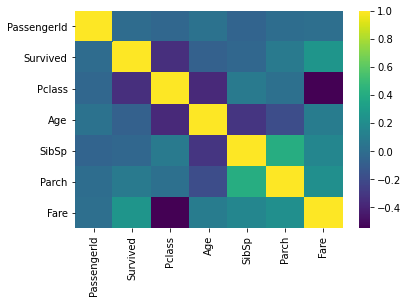

In [114]:
corr = df.corr()
sns.heatmap(corr, cmap="viridis")

In [115]:
groups = df.groupby(['Sex','Pclass', 'Title'])  

# view the median Age by the grouped features 
print(groups.Age.median())
df.Age = groups.Age.apply(lambda x: x.fillna(x.median()))
df

Sex     Pclass  Title  
female  1       Army       49.0
                Miss       30.0
                Monarch    40.5
                Mrs        40.0
        2       Miss       24.0
                Mrs        31.5
        3       Miss       18.0
                Mrs        31.0
male    1       Army       51.0
                Master      4.0
                Monarch    40.0
                Mr         40.0
        2       Army       46.5
                Master      1.0
                Mr         31.0
        3       Master      4.0
                Mr         26.0
Name: Age, dtype: float64


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Army
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,18.0,1,2,W./C. 6607,23.4500,NaN,S,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr


In [116]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64

In [117]:
df.Age.value_counts()

26.00    108
18.00     59
40.00     41
31.00     35
24.00     32
        ... 
55.50      1
66.00      1
70.50      1
23.50      1
0.42       1
Name: Age, Length: 88, dtype: int64

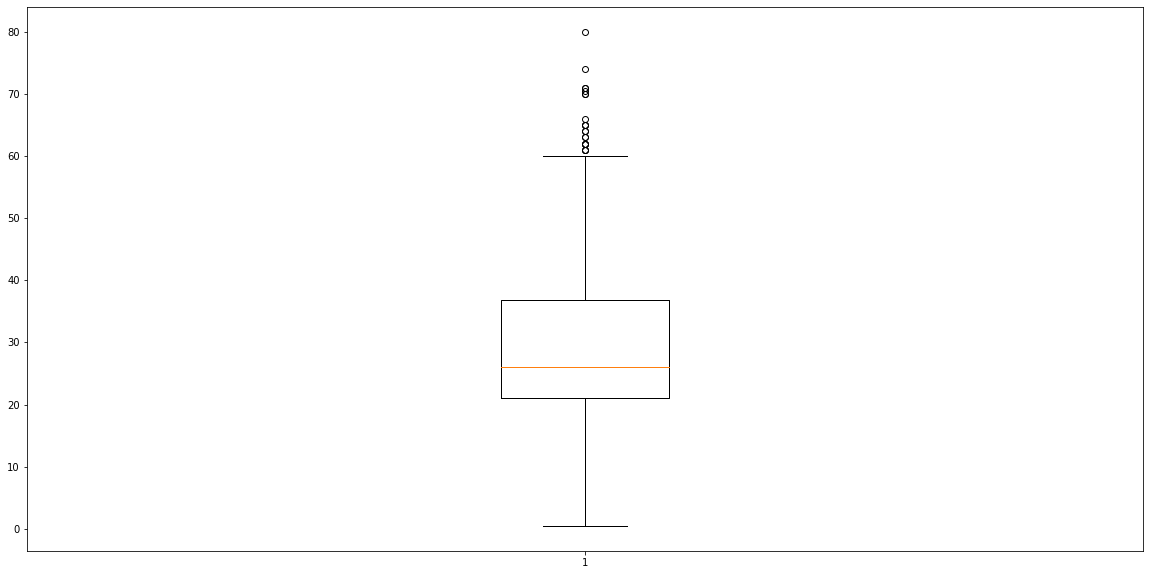

In [118]:
plt.figure(figsize=(20,10))
plt.boxplot(df.Age)
plt.show()

In [119]:
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [120]:
df["Embarked"].isna().sum()

2

In [121]:
highest_count = df.Embarked.value_counts().index[0]
df.Embarked = df.Embarked.fillna(highest_count)
df.Embarked.value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [122]:
df.Fare.isna().sum()

0

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
 12  Title        891 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


In [124]:
df.Cabin.isna().sum()

687

In [0]:
df.Cabin = df.Cabin.fillna('U')

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
 12  Title        891 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


In [127]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U,S,Mr


In [158]:
label = LabelEncoder()
df["Sex_Code"] = label.fit_transform(df['Sex'])
df["Embarked_Code"] = label.fit_transform(df["Embarked"])
df['Title_Code'] = label.fit_transform(df['Title'])
df['Cabin'] = label.fit_transform(df['Cabin'])
y = df['Survived']
df.columns
final = df[['PassengerId', 'Pclass', 'Age', 'SibSp',
       'Parch', 'Fare', 'Cabin', 'Sex_Code',
       'Embarked_Code', 'Title_Code']]
final

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Cabin,Sex_Code,Embarked_Code,Title_Code
0,1,3,22.0,1,0,7.2500,147,1,2,4
1,2,1,38.0,1,0,71.2833,81,0,0,5
2,3,3,26.0,0,0,7.9250,147,0,2,2
3,4,1,35.0,1,0,53.1000,55,0,2,5
4,5,3,35.0,0,0,8.0500,147,1,2,4
...,...,...,...,...,...,...,...,...,...,...
886,887,2,27.0,0,0,13.0000,147,1,2,0
887,888,1,19.0,0,0,30.0000,30,0,2,2
888,889,3,18.0,1,2,23.4500,147,0,2,2
889,890,1,26.0,0,0,30.0000,60,1,0,4


In [0]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(final, y)

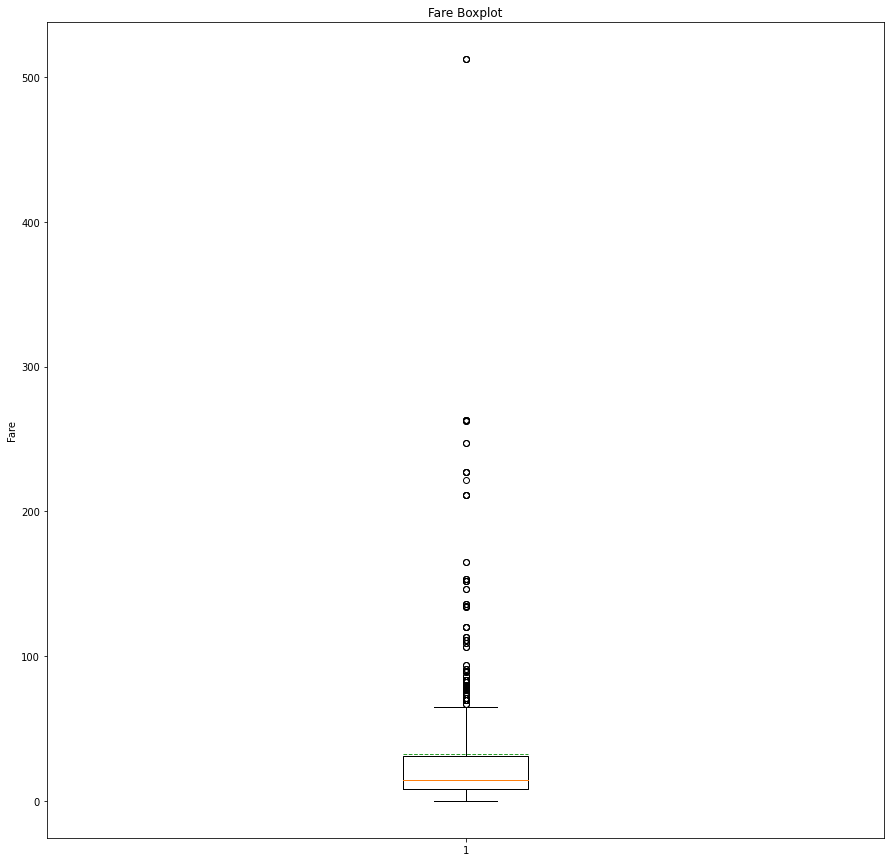

In [137]:
plt.figure(figsize=(15,15))
plt.boxplot(x=df["Fare"], showmeans=True, meanline=True)
plt.title("Fare Boxplot")
plt.ylabel('Fare')
plt.show()

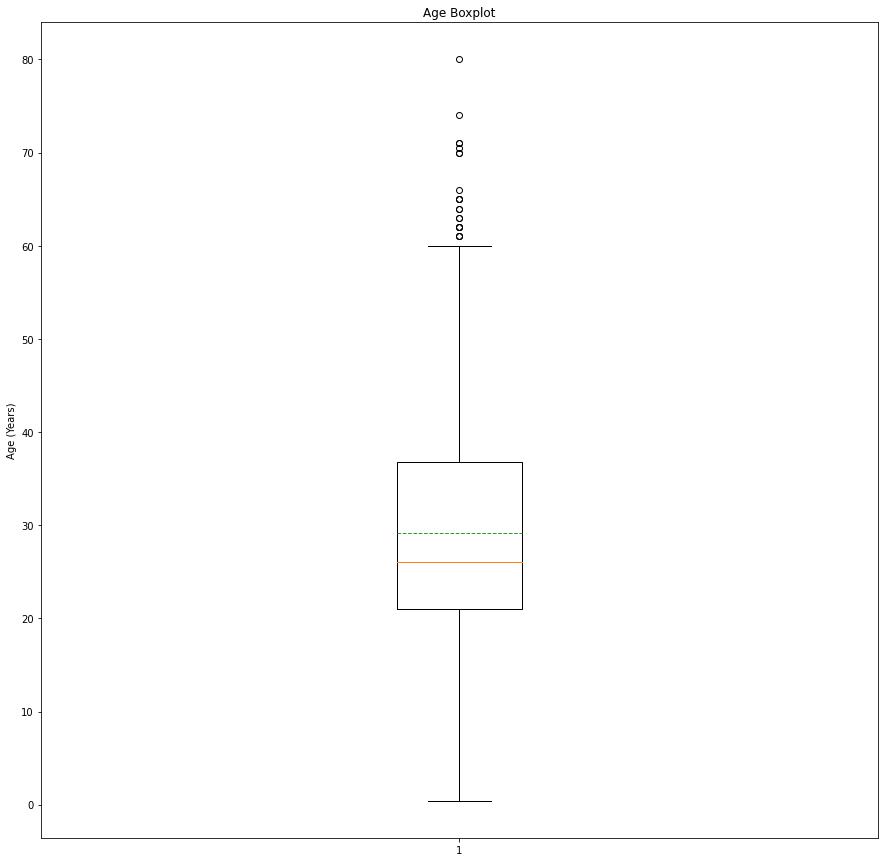

In [138]:
plt.figure(figsize=(15,15))
plt.boxplot(x=df["Age"], showmeans=True, meanline=True)
plt.title("Age Boxplot")
plt.ylabel('Age (Years)')
plt.show()

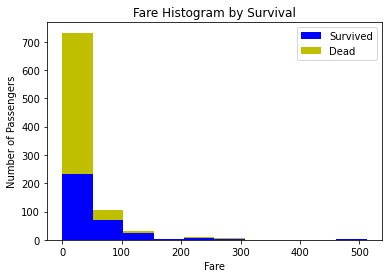

In [139]:
plt.hist(x = [df[df['Survived']==1]['Fare'], df[df['Survived']==0]['Fare']], 
         stacked=True, color = ['b','y'],label = ['Survived','Dead'])
plt.title('Fare Histogram by Survival')
plt.xlabel('Fare')
plt.ylabel('Number of Passengers')
plt.legend()

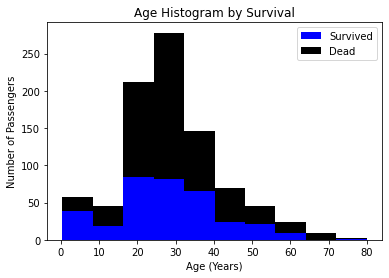

In [140]:
plt.hist(x = [df[df['Survived']==1]['Age'], df[df['Survived']==0]['Age']], 
         stacked=True, color = ['blue','black'],label = ['Survived','Dead'])
plt.title('Age Histogram by Survival')
plt.xlabel('Age (Years)')
plt.ylabel('Number of Passengers')
plt.legend()

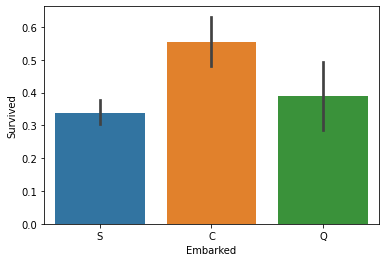

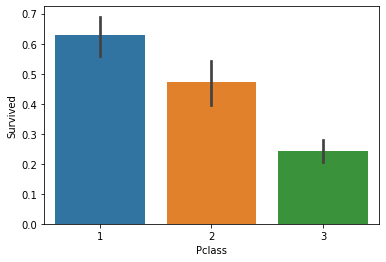

In [146]:
sns.barplot(x='Embarked', y='Survived', data=df)
plt.show()
sns.barplot(x = 'Pclass', y = 'Survived', order=[1,2,3], data=df)

Text(0.5, 1.0, 'Pclass vs Age Survival Comparison')

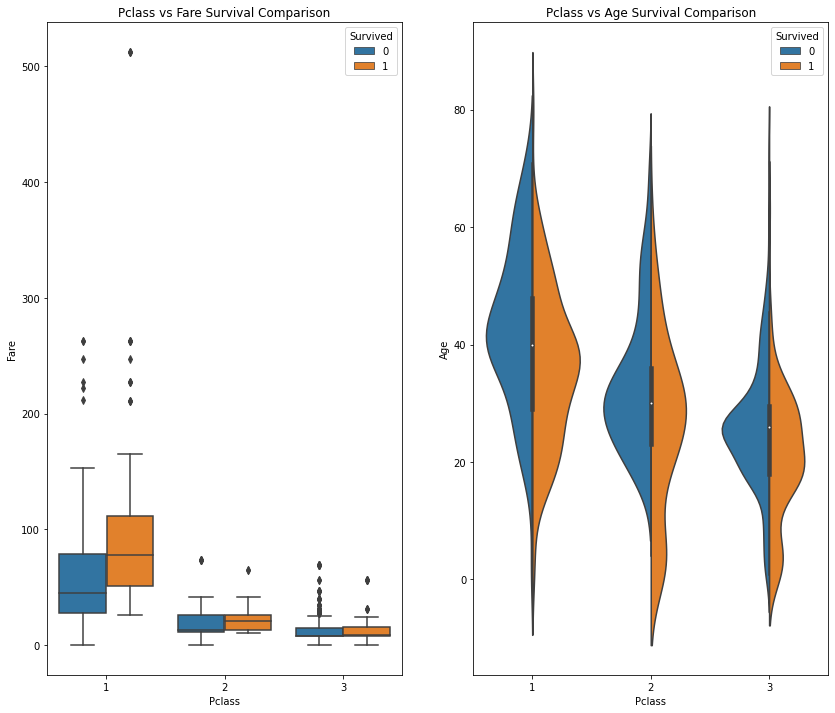

In [149]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(14,12))

sns.boxplot(x = 'Pclass', y = 'Fare', hue = 'Survived', data = df, ax = axis1)
axis1.set_title('Pclass vs Fare Survival Comparison')

sns.violinplot(x = 'Pclass', y = 'Age', hue = 'Survived', data = df, split = True, ax = axis2)
axis2.set_title('Pclass vs Age Survival Comparison')

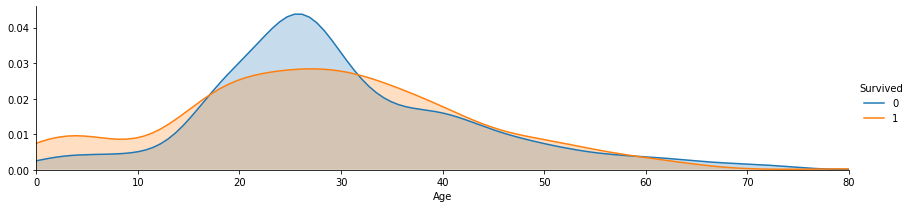

In [150]:
a = sns.FacetGrid( df, hue = 'Survived', aspect=4 )
a.map(sns.kdeplot, 'Age', shade= True )
a.set(xlim=(0 , df['Age'].max()))
a.add_legend()

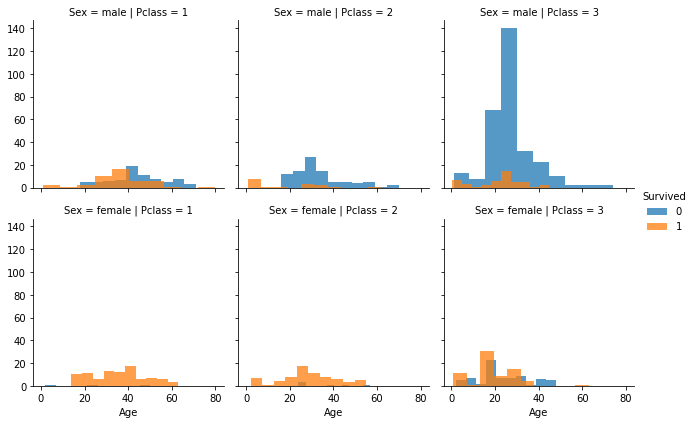

In [151]:
h = sns.FacetGrid(df, row = 'Sex', col = 'Pclass', hue = 'Survived')
h.map(plt.hist, 'Age', alpha = .75)
h.add_legend()

The accuracy of the Logistic Regression is 80.27


Text(0.5, 1.05, 'Confusion_matrix')

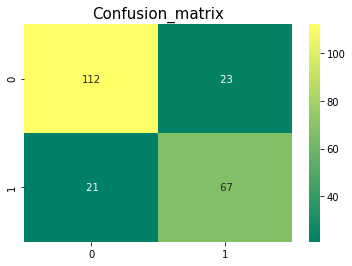

In [190]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
model = LogisticRegression()
model.fit(X_train,y_train)
prediction_lr=model.predict(X_test)
result_lr = roc_auc_score(prediction_lr, y_test)
print('The accuracy of the Logistic Regression is',round(accuracy_score(prediction_lr,y_test)*100,2))
sns.heatmap(confusion_matrix(prediction_lr, y_test),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

The accuracy of the Random Forest is 82.06


Text(0.5, 1.05, 'Confusion_matrix')

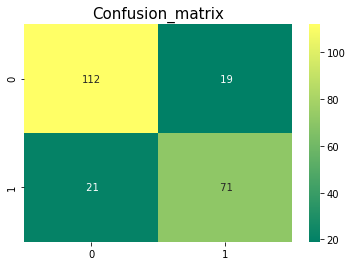

In [191]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(criterion='gini', n_estimators=700)
model.fit(X_train,y_train)
prediction_rf=model.predict(X_test)
result_rf = roc_auc_score(prediction_rf, y_test)
print('The accuracy of the Random Forest is',round(accuracy_score(prediction_rf,y_test)*100,2))
sns.heatmap(confusion_matrix(prediction_rf,y_test),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

The accuracy of the Support Vector Classifier is 65.92


Text(0.5, 1.05, 'Confusion_matrix')

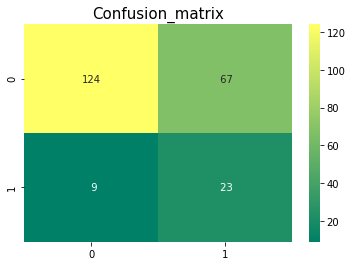

In [192]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train,y_train)
prediction_svc=model.predict(X_test)
result_svc = roc_auc_score(prediction_svc, y_test)
print('The accuracy of the Support Vector Classifier is',round(accuracy_score(prediction_svc,y_test)*100,2))
sns.heatmap(confusion_matrix(prediction_svc,y_test),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

The accuracy of the kNN Classifier is 65.47


Text(0.5, 1.05, 'Confusion_matrix')

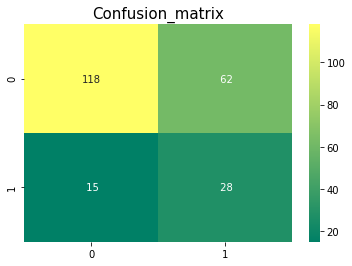

In [193]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=4)
model.fit(X_train,y_train)
prediction_knn=model.predict(X_test)
result_knn = roc_auc_score(prediction_knn, y_test)
print('The accuracy of the kNN Classifier is',round(accuracy_score(prediction_knn,y_test)*100,2))
sns.heatmap(confusion_matrix(prediction_knn,y_test),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

The accuracy of Naive Bayes is:  75.34


Text(0.5, 1.05, 'Confusion_matrix')

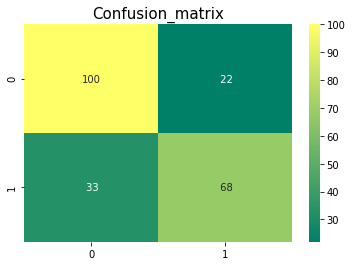

In [194]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)
prediction_nb = model.predict(X_test)
result_nb = roc_auc_score(prediction_nb, y_test)
print("The accuracy of Naive Bayes is: ", round(accuracy_score(prediction_nb, y_test)*100,2))
sns.heatmap(confusion_matrix(prediction_nb,y_test),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

The accuracy of Decision Tree is:  77.58


Text(0.5, 1.05, 'Confusion_matrix')

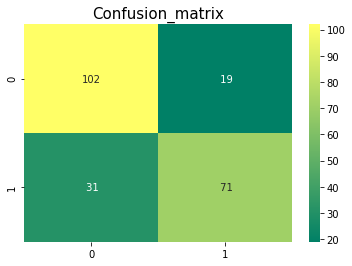

In [195]:
from sklearn.tree import DecisionTreeClassifier
model= DecisionTreeClassifier(criterion='gini', 
                             min_samples_split=10,min_samples_leaf=1,
                             max_features='auto')
model.fit(X_train,y_train)
prediction_tree=model.predict(X_test)
result_tree = roc_auc_score(prediction_tree, y_test)
print("The accuracy of Decision Tree is: ", round(accuracy_score(prediction_tree, y_test)*100,2))
sns.heatmap(confusion_matrix(prediction_tree,y_test),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

The accuracy of Decision Tree is:  81.17


Text(0.5, 1.05, 'Confusion_matrix')

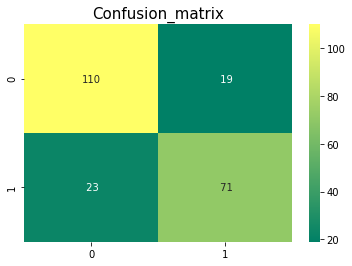

In [196]:
from sklearn.ensemble import AdaBoostClassifier
model= AdaBoostClassifier()
model.fit(X_train,y_train)
prediction_adb=model.predict(X_test)
result_adb = roc_auc_score(prediction_adb, y_test)
print("The accuracy of Decision Tree is: ", round(accuracy_score(prediction_adb, y_test)*100,2))
sns.heatmap(confusion_matrix(prediction_adb,y_test),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

The accuracy of LDA is:  79.82


Text(0.5, 1.05, 'Confusion_matrix')

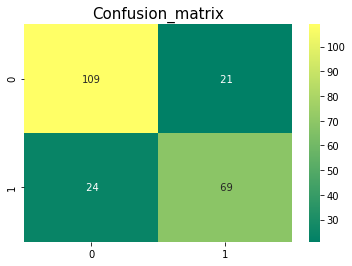

In [197]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
model= LinearDiscriminantAnalysis()
model.fit(X_train,y_train)
prediction_lda=model.predict(X_test)
result_lda = roc_auc_score(prediction_lda, y_test)
print("The accuracy of LDA is: ", round(accuracy_score(prediction_lda, y_test)*100,2))
sns.heatmap(confusion_matrix(prediction_lda,y_test),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)

0.8318536342515765
The accuracy of GBC is:  83.86


Text(0.5, 1.05, 'Confusion_matrix')

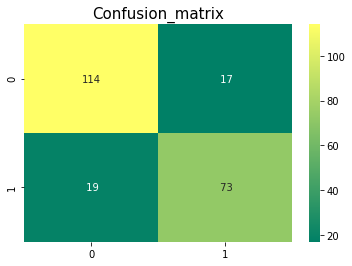

In [189]:
from sklearn.ensemble import GradientBoostingClassifier
model= GradientBoostingClassifier()
model.fit(X_train,y_train)
prediction_gbc=model.predict(X_test)
result_gbc = roc_auc_score(prediction_gbc, y_test)
print(result_gbc)
print("The accuracy of GBC is: ", round(accuracy_score(prediction_gbc, y_test)*100,2))
sns.heatmap(confusion_matrix(prediction_gbc,y_test),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)


In [198]:
# Sort by highest AUC ROC SCORE
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'AdaBoostClassifier', 
              'Gradient Boosting', 'Linear Discriminant Analysis', 
              'Decision Tree'],
    'Score': [result_svc, result_knn, result_lr, 
              result_rf, result_nb, result_adb, 
              result_gbc, result_lda, result_tree]})
models.sort_values(by='Score',ascending=False)

,Model,Score
6,Gradient Boosting,0.831854
3,Random Forest,0.813350
5,AdaBoostClassifier,0.804016
2,Logistic Regression,0.795497
7,Linear Discriminant Analysis,0.790199
8,Decision Tree,0.769527
4,Naive Bayes,0.746470
0,Support Vector Machines,0.683982
1,KNN,0.653359
